In [1]:
import pandas as pd
import numpy as np
import sys, os

from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

p = Path(".")

In [28]:
df = pd.read_csv(p / "../logs/2022_07_13T11_42_log_server2.log")

ts = df.groupby('tick')['last'].count().reset_index()
ts['f'] = 1 / ts['last']
ts.columns = ['tick', 'c', 'f']

modticks = []
for idx, row in ts.iterrows():
    for i in range(int(row.c)):
        modticks.append(row.tick + i * row.f)
        
df['tick'] = modticks
df = df.set_index('tick')

### Check Mid and PMid

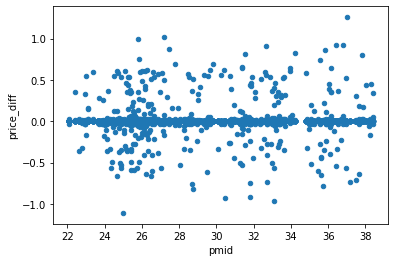

In [16]:
tmp = df.copy()
tmp['mid_diff'] = tmp.pmid - tmp.mid
tmp['price_diff'] = tmp['last'].diff()
tmp.plot.scatter('pmid', 'price_diff')

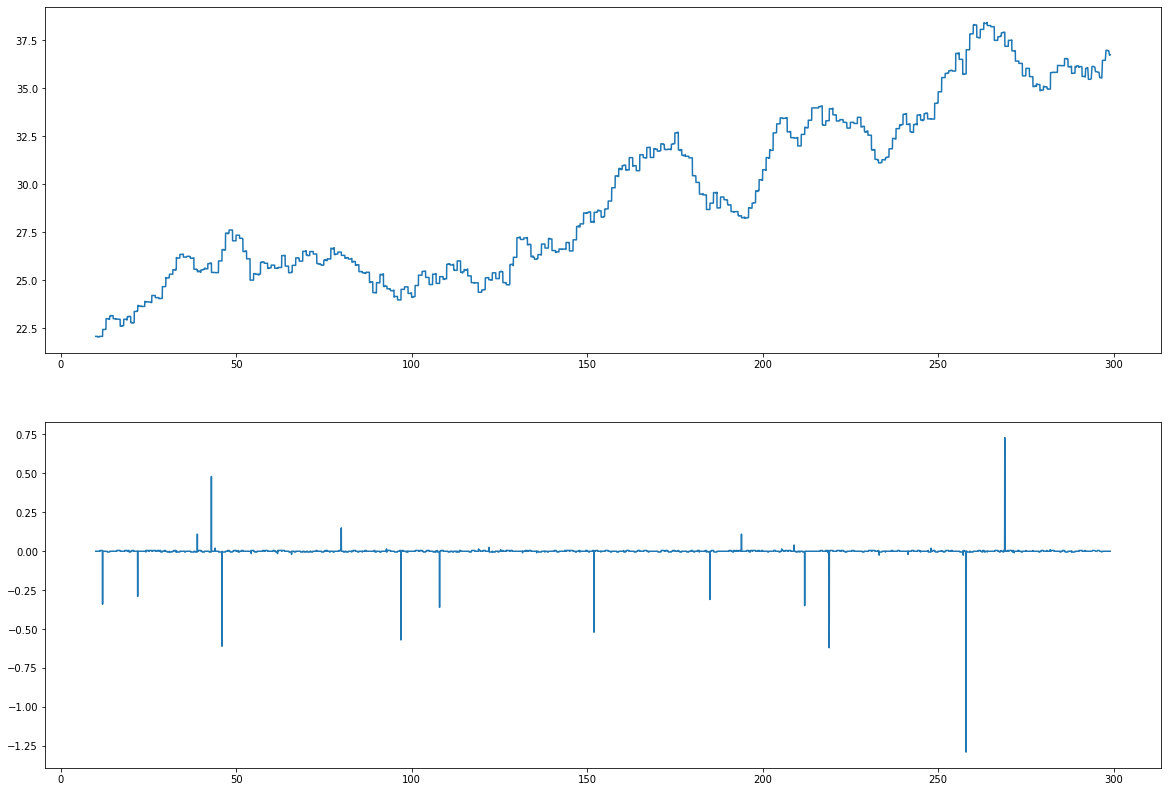

In [17]:
f, ax = plt.subplots(2, 1, figsize=(20, 14))
ax[0].plot(tmp.index, tmp['last'])
ax[1].plot(tmp.index, tmp.mid_diff)

### Last vs Mid

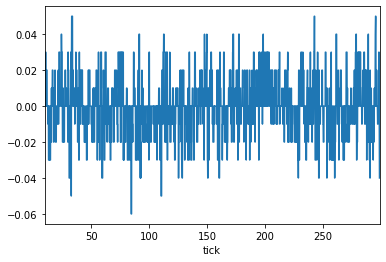

In [18]:
tmp = df.copy()
tmp['ml_diff'] = tmp.pmid - tmp['last']
tmp.ml_diff.plot()

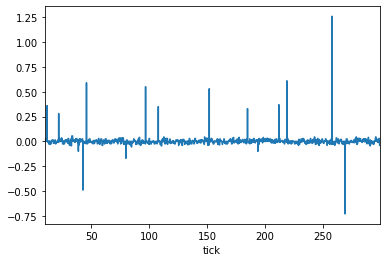

In [19]:
tmp = df.copy()
tmp['ml_diff'] = tmp.mid - tmp['last']
tmp.ml_diff.plot()

### Trend Indicator

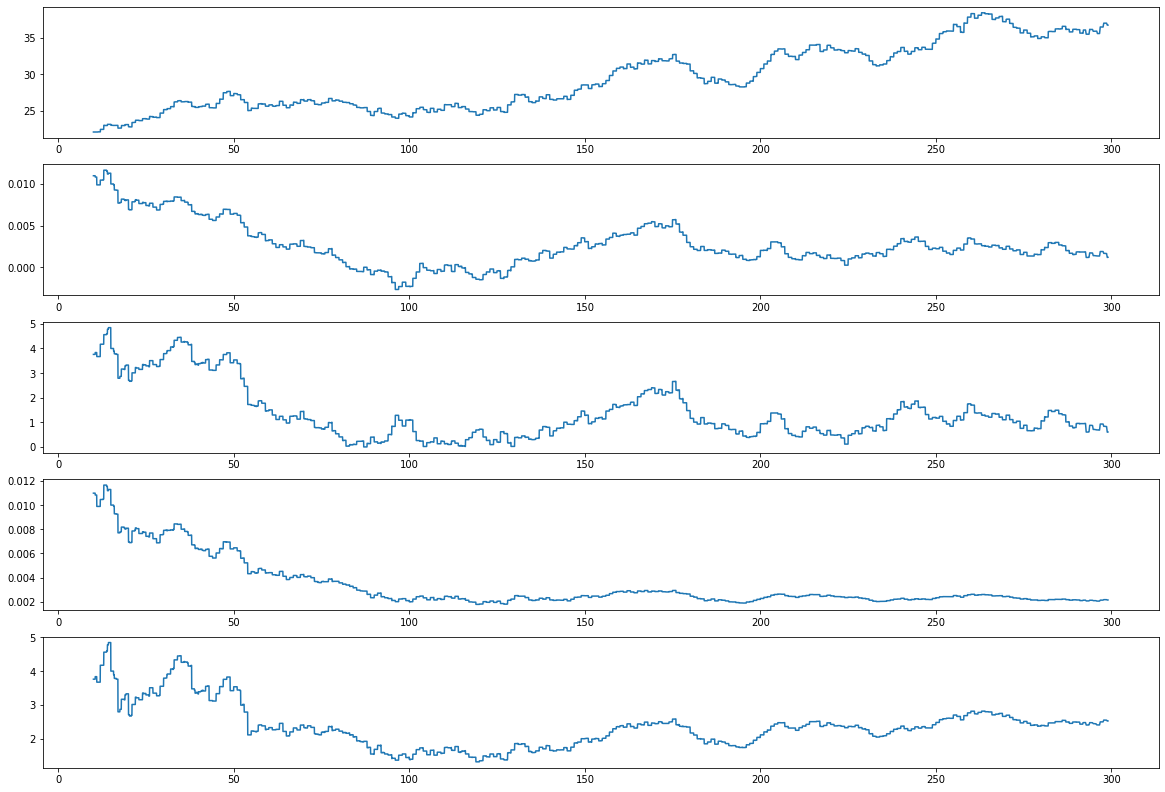

In [20]:
f, ax = plt.subplots(5, 1, figsize=(20, 14))

ax[0].plot(df.index, df.pmid)
ax[1].plot(df.index, df.trend)
ax[2].plot(df.index, df.trend_confidence)

ax[3].plot(df.index, df.gtrend)
ax[4].plot(df.index, df.gtrend_confidence)

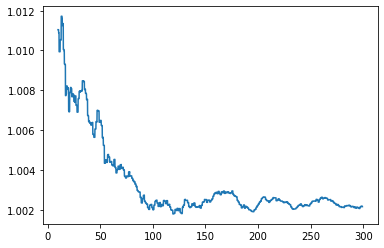

In [26]:
plt.plot(df.index, np.exp(df.gtrend))

### LOB Imbalance

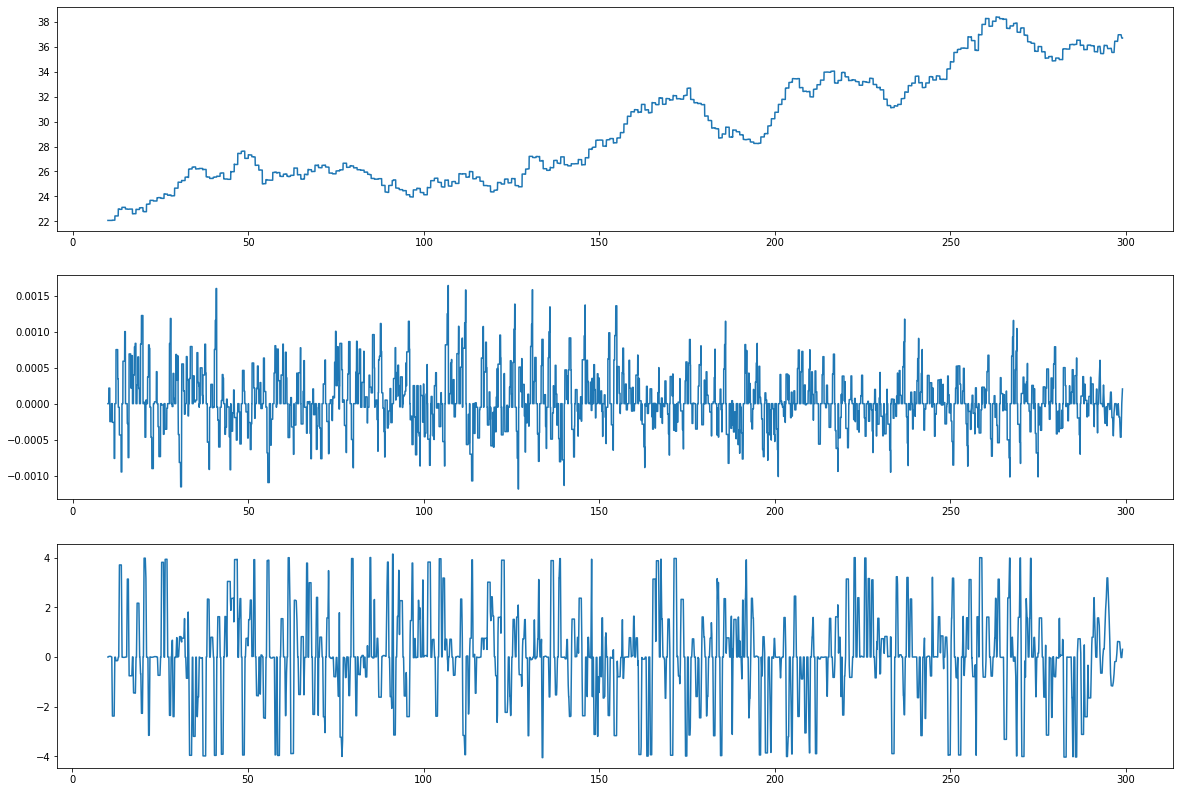

In [21]:
f, ax = plt.subplots(3, 1, figsize=(20, 14))

ax[0].plot(df.index, df.pmid)
ax[1].plot(df.index, df.LOB_imbalance)
ax[2].plot(df.index, df.LOB_mass_imbalance.rolling(5).sum())

In [22]:
x = df.LOB_imbalance
bids = x[x > 0].sum()
asks = x[x < 0].abs().sum()
bids, asks

(1.1046748565399431, 0.8011243086732098)

In [23]:
x = df.LOB_mass_imbalance
bids = x[x > 0].sum()
asks = x[x < 0].abs().sum()
bids, asks

(917.8207441104556, 889.2261168065422)

### Best Bid

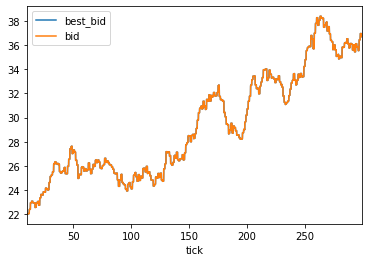

In [24]:
df[['best_bid', 'bid']].plot()

### Time Factor 

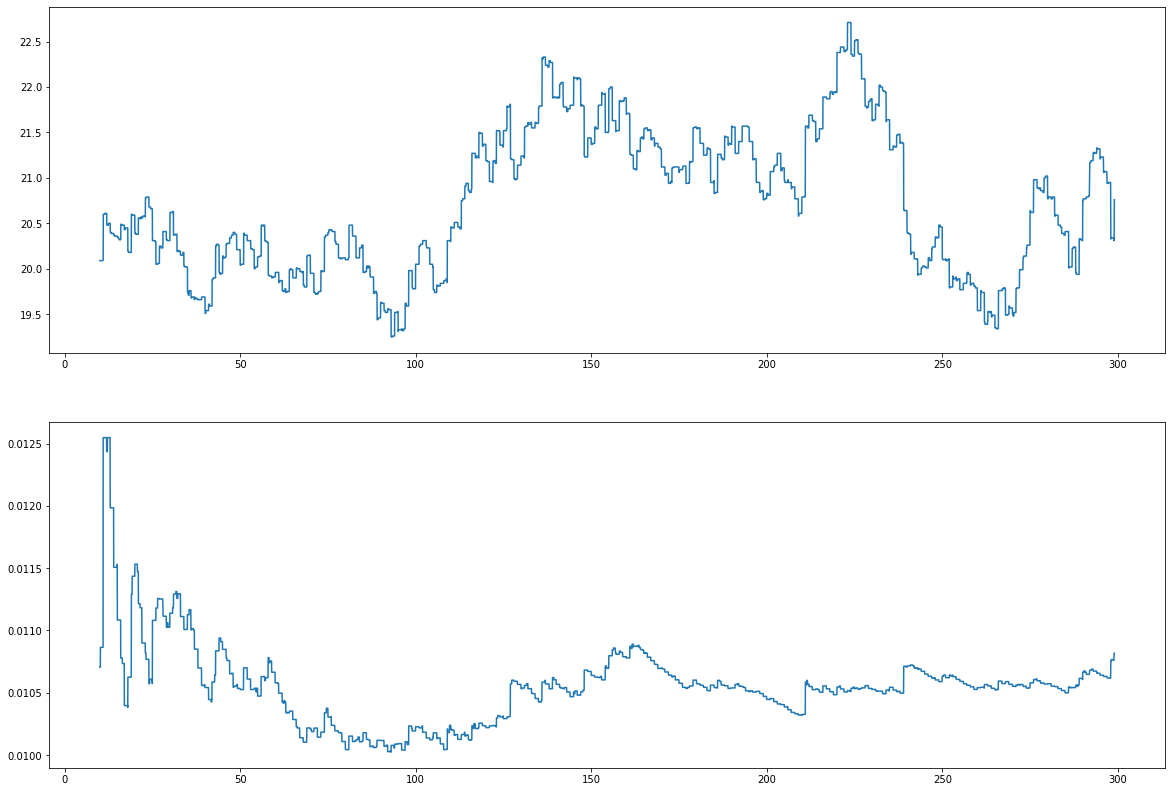

In [31]:
f, ax = plt.subplots(2, 1, figsize=(20, 14))
ax[0].plot(df.index, df['pmid'])
ax[1].plot(df.index, df.vol)